In [5]:
import pandas as pd
import numpy as np

In [2]:
import os

In [4]:
path = "C:/Users/Dell/Desktop/Python/ds_salaries"
os.chdir(path)

In [3]:
os.getcwd()

'c:\\Users\\Dell\\Desktop\\R\\data_science_wages\\Python'

In [9]:
df1 = pd.read_csv('dataset/ds_salaries.csv')
df1.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
df = df1.drop('Unnamed: 0', axis=1)
df = df.drop('salary_currency', axis=1)
df = df.drop('salary', axis=1)
df = df.drop('work_year', axis=1)
df.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,79833,DE,0,DE,L
1,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [11]:
df1['work_year_category'] = df1['work_year'].astype(str)

**DATASET INFORMATION**

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
- employment_type: The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- company_size: The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [12]:
df.dtypes

experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary_in_usd,607.0,112297.869852,70957.259411,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,40.709130,0.0,50.0,100.0,100.0,100.0


In [14]:
cm = df.corr()
cm

C:\Users\Dell\AppData\Local\Temp\ipykernel_12916\3021196231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


,salary_in_usd,remote_ratio
salary_in_usd,1.000000,0.132122
remote_ratio,0.132122,1.000000


In [15]:
job_categories = ["Data Science", "Data Analytics", "Data Engineering", "Machine Learning", "Managerial", "Consultant"]

data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Architect|Infrastructure"
ml_engineer = "Machine Learning|ML|Big Data|AI"
manager = "Manager|Head|Director|Lead|Principal|Staff"
consultant = "Consultant|Freelance"

conditions=[
    (df["job_title"].str.contains(data_science)),
    (df["job_title"].str.contains(data_analyst)),
    (df["job_title"].str.contains(data_engineer)),
    (df["job_title"].str.contains(ml_engineer)),
    (df["job_title"].str.contains(manager)),
    (df["job_title"].str.contains(consultant))
]
df["job_category"] = np.select(conditions, job_categories, default="Other")

In [16]:
df[["job_title","job_category"]].head()

,job_title,job_category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analytics
4,Machine Learning Engineer,Machine Learning


In [17]:
df = df.drop('job_title', axis = 1)

<Axes: xlabel='job_category', ylabel='count'>

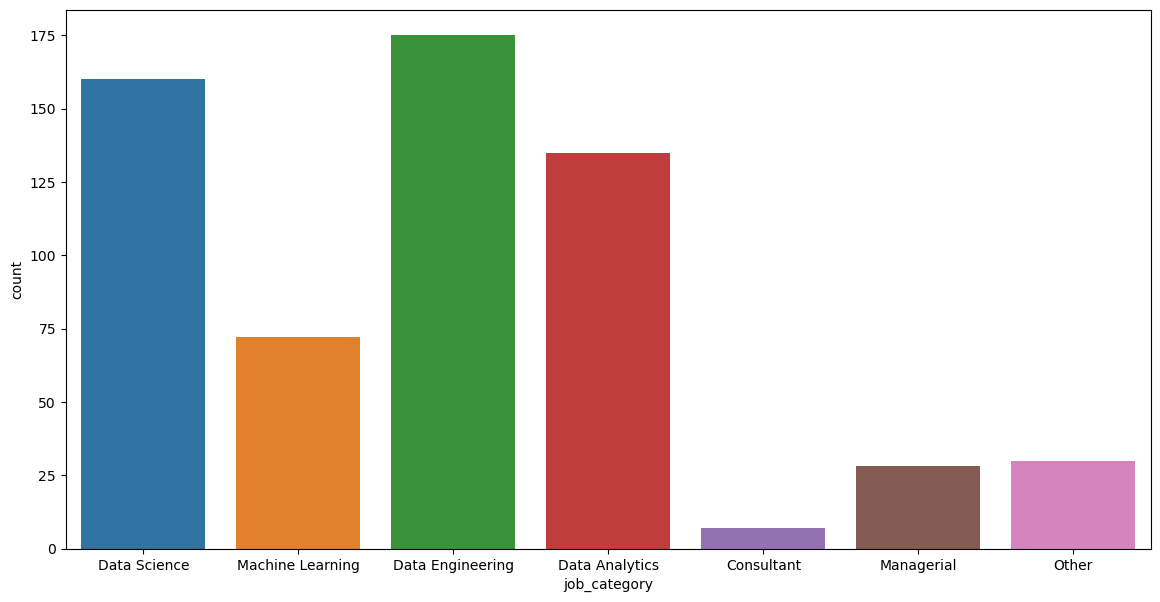

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7)) 
sns.countplot(data=df, x="job_category")

In [21]:
import country_converter as coco
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [22]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [23]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = "Most of the employees' location are USA" )

fig.update_layout(font = dict(size= 17, family="Franklin Gothic"))
fig.show()

In [24]:
px.histogram(df,x='salary_in_usd',marginal='rug',template='seaborn',labels={'salary_in_usd':'Salary in USD'},title='<b> Salary Distribution')

In [25]:
px.box(df,x='experience_level',y='salary_in_usd',color='experience_level',labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'},title='<b>Data Sceince Salaries by Experience')

In [26]:
X = df.drop('salary_in_usd', axis = 1)
y = df['salary_in_usd']
X = pd.get_dummies(X)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

## Ordinary Least Squares

In [28]:
import statsmodels.api as sm
X1 = sm.add_constant(X_train)

In [29]:
model = sm.OLS(y_train, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     5.655
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.99e-33
Time:                        15:43:30   Log-Likelihood:                -5925.1
No. Observations:                 485   AIC:                         1.202e+04
Df Residuals:                     399   BIC:                         1.238e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## YORUM

### Assumption Check

In [39]:
# Residual normality

from scipy import stats

stats.shapiro(model.resid)

ShapiroResult(statistic=0.7915533781051636, pvalue=1.8937288394513405e-24)

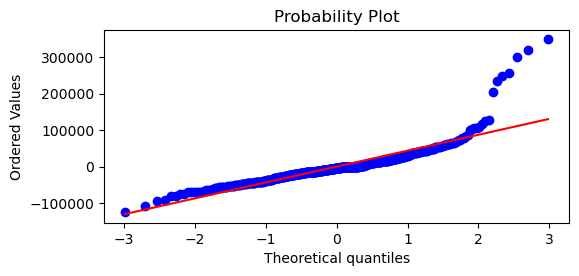

In [32]:
# Error Terms to be Independent and Normally Distributed

import scipy.stats as stats
import matplotlib.pyplot as plt

residuals = model.resid
fig, ax = plt.subplots(figsize=(6, 2.5))
_, (__, ___, r) = stats.probplot(residuals, plot=ax, fit=True)



In [37]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model.resid, X1)
bp_test[3] # for p value

0.999992372603416

In [38]:
if bp_test[1] < 0.05:
    print("Heteroskedasticity is present.")
else:
    print("Heteroskedasticity is not present.")

Heteroskedasticity is not present.


Text(0, 0.5, 'residuals')

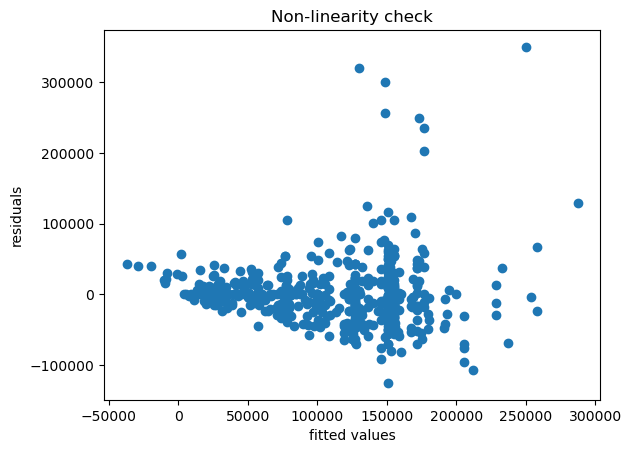

In [34]:
# Non-linearity

plt.scatter(model.fittedvalues, model.resid)
plt.title('Non-linearity check')
plt.xlabel('fitted values')
plt.ylabel('residuals')

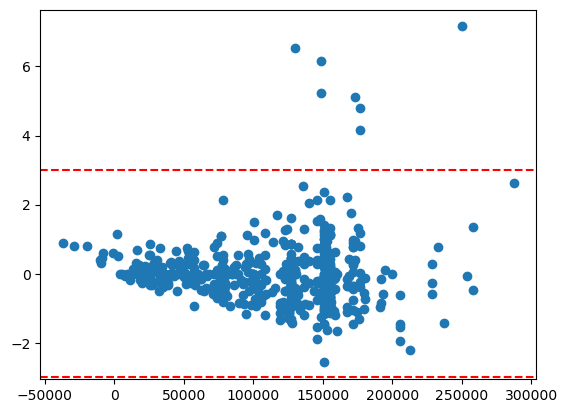

In [43]:
# Outlier

residuals_standardized = (model.resid - np.mean(model.resid)) / np.std(model.resid)

plt.scatter(model.fittedvalues, residuals_standardized)
plt.axhline(y=-3, color='r', linestyle='--', label='-3')
plt.axhline(y=3, color='r', linestyle='--', label='3')


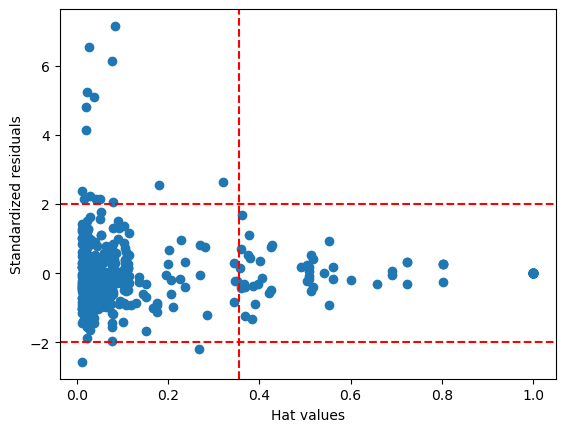

In [48]:
plt.scatter(model.get_influence().hat_matrix_diag, residuals_standardized)
plt.xlabel("Hat values")
plt.ylabel("Standardized residuals")
plt.axhline(y=-2, color='r', linestyle='--')
plt.axhline(y=2, color='r', linestyle='--')
plt.axvline(x=2 * np.mean(model.get_influence().hat_matrix_diag), color='r', linestyle='--')


## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor
regression_tree = DecisionTreeRegressor()
regtree= regression_tree.fit(X, y)

## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'random_state': [42, 7, 19, 5]
}

model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi ortalama negatif MSE:", -grid_search.best_score_)



En iyi hiperparametreler: {'n_estimators': 200, 'random_state': 19}
En iyi ortalama negatif MSE: 3056655321.2967787


## Support Vector Machines

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from scipy.stats import expon, reciprocal

param_dist = {
    'C': reciprocal(0.1, 10, 100),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': expon(scale=1.0)
}

model = SVR()

randomized_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=10, scoring='neg_mean_squared_error')
randomized_search.fit(X, y)

print("En iyi hiperparametreler:", randomized_search.best_params_)
print("En iyi ortalama negatif MSE:", -randomized_search.best_score_)


## XGBOOST

In [35]:
import xgboost as xgb
model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

grid_search = GridSearchCV(model, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi ortalama negatif MSE:", -grid_search.best_score_)

En iyi hiperparametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
En iyi ortalama negatif MSE: 2888039061.827173


## AdaBoost

In [37]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

grid_search = GridSearchCV(adaboost, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [38]:
best_adaboost = AdaBoostRegressor(**grid_search.best_params_, random_state=42)
best_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.01, loss='exponential', random_state=42)

In [39]:
y_pred = best_adaboost.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2069854279.3209767
